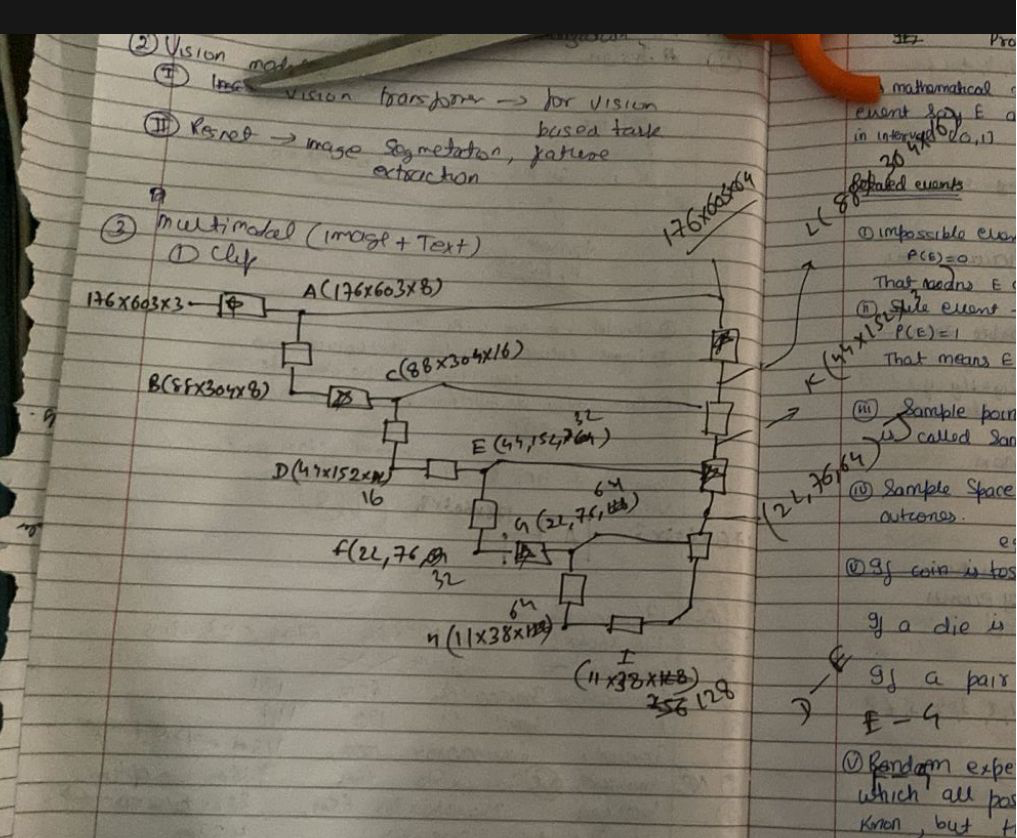

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [8]:
def image_to_feature_map_modified(input_tensor):
    # Conv to increase channels from 3 to 8 using 5x5 kernel
    x = layers.Conv2D(8, kernel_size=5, padding='same', use_bias=False)(input_tensor)
    x = layers.BatchNormalization()(x)

    # Depthwise + Pointwise
    x = layers.DepthwiseConv2D(kernel_size=3, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(max_value=6)(x)

    # Channel mixing with Conv 1x1 (keeps channels at 8)
    x = layers.Conv2D(8, kernel_size=1, padding='same', activation='relu', name="A")(x)
    
    return x

def downsample_keep_channels(input_tensor):
    # Depthwise conv for spatial downsampling (stride=2)
    x = layers.DepthwiseConv2D(kernel_size=3, strides=2, padding='same', use_bias=False)(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(max_value=6)(x)

    # Pointwise conv to mix features and keep channels same (8)
    x = layers.Conv2D(8, kernel_size=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(max_value=6, name="B")(x)
    return x

def feature_map_8_to_16(input_tensor):
    # Conv to increase channels from 8 to 16 using 5x5 kernel
    x = layers.Conv2D(16, kernel_size=5, padding='same', use_bias=False)(input_tensor)
    x = layers.BatchNormalization()(x)

    # Depthwise + Pointwise
    x = layers.DepthwiseConv2D(kernel_size=3, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(max_value=6)(x)

    # Channel mixing with Conv 1x1 (keeps channels at 16)
    x = layers.Conv2D(16, kernel_size=1, padding='same', activation='relu', name="C")(x)
    
    return x

def downsample_keep_channels_modified(input_tensor):
    # Depthwise conv for spatial downsampling (stride=2)
    x = layers.DepthwiseConv2D(kernel_size=3, strides=2, padding='same', use_bias=False)(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(max_value=6)(x)

    # Pointwise conv to keep the number of channels unchanged
    channels = input_tensor.shape[-1]
    x = layers.Conv2D(channels, kernel_size=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(max_value=6, name="D")(x)
    return x

def channel_expand_by_2x(input_tensor):
    # Initial standard conv for richer feature extraction
    x = layers.Conv2D(16, kernel_size=3, strides=1, padding='same', use_bias=False)(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(max_value=6)(x)

    # Depthwise conv to filter spatial information
    x = layers.DepthwiseConv2D(kernel_size=3, strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(max_value=6)(x)

    # Pointwise conv to mix and expand channels from 16 → 32
    x = layers.Conv2D(32, kernel_size=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(max_value=6, name = "E")(x)

    return x

def downsample_by_2(input_tensor):
    # Optional initial conv to refine features before downsampling
    x = layers.Conv2D(32, kernel_size=3, strides=1, padding='same', use_bias=False)(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(max_value=6)(x)

    # Depthwise convolution with stride=2 for downsampling by factor of 2
    x = layers.DepthwiseConv2D(kernel_size=3, strides=2, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(max_value=6)(x)

    # Pointwise conv to mix features and preserve 32 channels
    x = layers.Conv2D(32, kernel_size=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(max_value=6, name="F")(x)

    return x

def feature_map_32_to_64(input_tensor):
    # Conv to increase channels from 32 to 64 using 4x4 kernel
    x = layers.Conv2D(64, kernel_size=4, padding='same', use_bias=False)(input_tensor)
    x = layers.BatchNormalization()(x)

    # Depthwise + Pointwise
    x = layers.DepthwiseConv2D(kernel_size=3, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(max_value=6)(x)

    # Channel mixing with Conv 1x1 (keeps channels at 64)
    x = layers.Conv2D(64, kernel_size=1, padding='same', activation='relu', name="G")(x)
    
    return x

def downsample_by_2_keep_channels(input_tensor):
    channels = input_tensor.shape[-1]

    # Optional initial conv to refine features before downsampling
    x = layers.Conv2D(channels, kernel_size=3, strides=1, padding='same', use_bias=False)(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(max_value=6)(x)

    # Depthwise convolution with stride=2 to downsample spatial dimensions by 2
    x = layers.DepthwiseConv2D(kernel_size=3, strides=2, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(max_value=6)(x)

    # Pointwise conv to preserve the same number of channels
    x = layers.Conv2D(channels, kernel_size=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(max_value=6, name = "H")(x)

    return x


def channel_expand_64_to_128(input_tensor):
    # Initial standard conv for richer feature extraction
    x = layers.Conv2D(64, kernel_size=3, strides=1, padding='same', use_bias=False)(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(max_value=6)(x)

    # Depthwise conv to filter spatial information
    x = layers.DepthwiseConv2D(kernel_size=3, strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(max_value=6)(x)

    # Pointwise conv to mix and expand channels from 64 → 128
    x = layers.Conv2D(128, kernel_size=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(max_value=6, name="I")(x)

    return x

def fuse_and_project_features(x1, x2):
    # x1: (None, 22, 76, 64)
    # x2: (None, 11, 38, 128)

    # Upsample x2 to match x1's spatial dimensions
    x2_upsampled = layers.UpSampling2D(size=(2, 2), interpolation='bilinear')(x2)  # (None, 22, 76, 128)

    # Project x2 to 64 channels to match x1
    x2_projected = layers.Conv2D(64, kernel_size=1, padding='same', use_bias=False)(x2_upsampled)
    x2_projected = layers.BatchNormalization()(x2_projected)
    x2_projected = layers.ReLU(max_value=6)(x2_projected)

    # Concatenate along the channel axis: (None, 22, 76, 64 + 64)
    x = layers.Concatenate(axis=-1)([x1, x2_projected])  # (None, 22, 76, 128)

    # Fuse features and project back to 64 channels
    x = layers.Conv2D(64, kernel_size=3, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(max_value=6, name="J")(x)

    return x

def fuse_features_to_32(x1, x2):
    # x1: (None, 44, 152, 32)
    # x2: (None, 22, 76, 64)

    # Step 1: Upsample x2 to match x1's spatial dimensions
    x2_upsampled = layers.UpSampling2D(size=(2, 2), interpolation='bilinear')(x2)  # (None, 44, 152, 64)

    # Step 2: Project x2 to 32 channels
    x2_projected = layers.Conv2D(32, kernel_size=1, padding='same', use_bias=False)(x2_upsampled)
    x2_projected = layers.BatchNormalization()(x2_projected)
    x2_projected = layers.ReLU(max_value=6)(x2_projected)

    # Step 3: Concatenate x1 and x2_projected → (None, 44, 152, 64)
    x = layers.Concatenate(axis=-1)([x1, x2_projected])

    # Step 4: Fuse and reduce to 32 channels
    x = layers.Conv2D(32, kernel_size=3, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(max_value=6, name="K")(x)

    return x

def fuse_features_to_16(x1, x2):
    # x1: (None, 88, 304, 16)
    # x2: (None, 44, 152, 32)

    # Step 1: Upsample x2 to match x1's spatial dimensions
    x2_upsampled = layers.UpSampling2D(size=(2, 2), interpolation='bilinear')(x2)  # (None, 88, 304, 32)

    # Step 2: Project x2 to 16 channels
    x2_projected = layers.Conv2D(16, kernel_size=1, padding='same', use_bias=False)(x2_upsampled)
    x2_projected = layers.BatchNormalization()(x2_projected)
    x2_projected = layers.ReLU(max_value=6)(x2_projected)

    # Step 3: Concatenate x1 and x2_projected → (None, 88, 304, 32)
    x = layers.Concatenate(axis=-1)([x1, x2_projected])

    # Step 4: Fuse and reduce to 16 channels
    x = layers.Conv2D(16, kernel_size=3, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(max_value=6, name="L")(x)

    return x

def fuse_3_16_to_64(x1, x2):
    # x1: (None, 176, 608, 3)
    # x2: (None, 88, 304, 16)

    # Step 1: Upsample x2 to match x1's spatial dimensions
    x2_upsampled = layers.UpSampling2D(size=(2, 2), interpolation='bilinear')(x2)  # (None, 176, 608, 16)

    # Step 2: Project x1 to 32 channels
    x1_proj = layers.Conv2D(32, kernel_size=3, padding='same', use_bias=False)(x1)
    x1_proj = layers.BatchNormalization()(x1_proj)
    x1_proj = layers.ReLU(max_value=6)(x1_proj)

    # Step 3: Project x2 to 32 channels
    x2_proj = layers.Conv2D(32, kernel_size=3, padding='same', use_bias=False)(x2_upsampled)
    x2_proj = layers.BatchNormalization()(x2_proj)
    x2_proj = layers.ReLU(max_value=6)(x2_proj)

    # Step 4: Concatenate both → (None, 176, 608, 64)
    x = layers.Concatenate(axis=-1)([x1_proj, x2_proj])

    # Step 5: Fuse and output 64 channels
    x = layers.Conv2D(64, kernel_size=3, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU(max_value=6, name="output")(x)

    return x
def build_model(input_shape ):
    #arrays to store the skip connections and input layer
    skip_connections = []
    inputs = layers.Input(shape=(176, 608, 3))

    outputs = image_to_feature_map_modified(inputs)
    skip_connections.append(outputs)

    outputs = downsample_keep_channels(outputs)
    outputs = feature_map_8_to_16(outputs)
    skip_connections.append(outputs)

    outputs = downsample_keep_channels_modified(outputs)
    outputs = channel_expand_by_2x(outputs)
    skip_connections.append(outputs)

    outputs = downsample_by_2(outputs)
    outputs = feature_map_32_to_64(outputs)
    skip_connections.append(outputs)

    outputs = downsample_by_2_keep_channels(outputs)
    outputs = channel_expand_64_to_128(outputs)

    A, C, E, G = skip_connections[0], skip_connections[1], skip_connections[2], skip_connections[3] 

    ## concating with skip connections
    # G + I = J == outputs
    outputs = fuse_and_project_features(G,outputs)
    # E + J = K == outputs
    outputs = fuse_features_to_32(E, outputs)
    # C + K = L == oututs
    outputs = fuse_features_to_16(C, outputs)
    # A + L == output 
    outputs = fuse_3_16_to_64(A, outputs)
    
    model = models.Model(inputs = inputs, outputs = outputs)
    return model


In [10]:


input_shape = (176, 608, 3)
model = build_model(input_shape==input_shape)
model.summary()

dummy = tf.random.normal([1, 176, 608, 3])
out = model(dummy)
print("Output shape:", out.shape)  # Expected: (1, 176, 608, 3)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 176, 608,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_66 (Conv2D)  │ (None, 176, 608,  │        600 │ input_layer_3[0]… │
│                     │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 176, 608,  │         32 │ conv2d_66[0][0]   │
│ (BatchNormalizatio… │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ depthwise_conv2d_27 │ (None, 176, 608,  │         72 │ batch_normalizat… │
│ (DepthwiseConv2D)   │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 176, 608,  │         32 │ depthwise_conv2d… │
│ (BatchNormalizatio… │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_54 (ReLU)     │ (None, 176, 608,  │          0 │ batch_normalizat… │
│                     │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ A (Conv2D)          │ (None, 176, 608,  │         72 │ re_lu_54[0][0]    │
│                     │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ depthwise_conv2d_28 │ (None, 88, 304,   │         72 │ A[0][0]           │
│ (DepthwiseConv2D)   │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 88, 304,   │         32 │ depthwise_conv2d… │
│ (BatchNormalizatio… │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_55 (ReLU)     │ (None, 88, 304,   │          0 │ batch_normalizat… │
│                     │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_67 (Conv2D)  │ (None, 88, 304,   │         64 │ re_lu_55[0][0]    │
│                     │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 88, 304,   │         32 │ conv2d_67[0][0]   │
│ (BatchNormalizatio… │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B (ReLU)            │ (None, 88, 304,   │          0 │ batch_normalizat… │
│                     │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_68 (Conv2D)  │ (None, 88, 304,   │      3,200 │ B[0][0]           │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 88, 304,   │         64 │ conv2d_68[0][0]   │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ depthwise_conv2d_29 │ (None, 88, 304,   │        144 │ batch_normalizat… │
│ (DepthwiseConv2D)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 88, 304,   │         64 │ depthwise_conv2d

 Total params: 299,088 (1.14 MB)

 Trainable params: 296,720 (1.13 MB)

 Non-trainable params: 2,368 (9.25 KB)

Output shape: (1, 176, 608, 64)


## tflite model

In [11]:
import numpy as np

# Assume build_model() is already defined and model is created
input_shape = (176, 608, 3)
optimized_model = build_model(input_shape=input_shape)

# Step 1: Convert the Keras model to TensorFlow Lite
def convert_to_tflite(keras_model, tflite_model_path='encoder_9.tflite'):
    # Create a converter object from the Keras model
    converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
    # Optional optimizations (comment out if not needed)
    # converter.optimizations = [tf.lite.Optimize.DEFAULT]
    tflite_model = converter.convert()
    
    # Save the converted model to disk
    with open(tflite_model_path, 'wb') as f:
        f.write(tflite_model)
    print(f"TFLite model saved to: {tflite_model_path}")

convert_to_tflite(model)


INFO:tensorflow:Assets written to: /var/folders/xb/sshzwv1128l88chp71np05t40000gn/T/tmpiqezmvk1/assets


INFO:tensorflow:Assets written to: /var/folders/xb/sshzwv1128l88chp71np05t40000gn/T/tmpiqezmvk1/assets


Saved artifact at '/var/folders/xb/sshzwv1128l88chp71np05t40000gn/T/tmpiqezmvk1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 176, 608, 3), dtype=tf.float32, name='keras_tensor_306')
Output Type:
  TensorSpec(shape=(None, 176, 608, 64), dtype=tf.float32, name=None)
Captures:
  6350785808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6350785232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6350786384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6350787536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6350787344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6350785040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6350785616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6350788688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6350788112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6350783312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  63507

W0000 00:00:1748698201.059202 1747731 tf_tfl_flatbuffer_helpers.cc:392] Ignored output_format.
W0000 00:00:1748698201.060338 1747731 tf_tfl_flatbuffer_helpers.cc:395] Ignored drop_control_dependency.
2025-05-31 19:00:01.061892: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/xb/sshzwv1128l88chp71np05t40000gn/T/tmpiqezmvk1
2025-05-31 19:00:01.065498: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-05-31 19:00:01.065506: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/xb/sshzwv1128l88chp71np05t40000gn/T/tmpiqezmvk1
2025-05-31 19:00:01.105571: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2025-05-31 19:00:01.113018: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-05-31 19:00:01.403231: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at 

In [12]:
import time


def run_tflite_inference_with_timing(tflite_model_path='encoder_9.tflite', input_shape=(176,608,3), num_iterations=10):
    interpreter = tf.lite.Interpreter(model_path=tflite_model_path, num_threads=4)
    interpreter.allocate_tensors()
    
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    for i in range(num_iterations):
        input_data = np.random.random_sample((1,) + input_shape).astype(np.float32)
        interpreter.set_tensor(input_details[0]['index'], input_data)
        
        start_time = time.time()
        interpreter.invoke()
        end_time = time.time()
        
        output_data = interpreter.get_tensor(output_details[0]['index'])
        
        inference_time = (end_time - start_time) * 1000  # milliseconds
        print(f"Inference {i+1}: output shape = {output_data.shape}, time = {inference_time:.2f} ms")

# Run inference with timing
run_tflite_inference_with_timing()

Inference 1: output shape = (1, 176, 608, 64), time = 49.14 ms
Inference 2: output shape = (1, 176, 608, 64), time = 43.07 ms
Inference 3: output shape = (1, 176, 608, 64), time = 40.71 ms
Inference 4: output shape = (1, 176, 608, 64), time = 40.97 ms
Inference 5: output shape = (1, 176, 608, 64), time = 41.30 ms
Inference 6: output shape = (1, 176, 608, 64), time = 42.86 ms
Inference 7: output shape = (1, 176, 608, 64), time = 41.39 ms
Inference 8: output shape = (1, 176, 608, 64), time = 84.52 ms
Inference 9: output shape = (1, 176, 608, 64), time = 51.84 ms
Inference 10: output shape = (1, 176, 608, 64), time = 42.73 ms


## qunatising  INT8 model

In [13]:
import tensorflow as tf
import numpy as np

# Assume `model` is the full model you've constructed using the provided blocks
# Example placeholder:
# model = tf.keras.Model(inputs=input_tensor, outputs=final_output_tensor)

# Dummy representative dataset generator
def representative_data_gen():
    for _ in range(100):
        # Replace (height, width, channels) with your input shape
        dummy_input = np.random.rand(1, 176, 608, 3).astype(np.float32)
        yield [dummy_input]

# Convert the model to a TensorFlow Lite model with full INT8 quantization
def convert_model_to_int8(model, output_path="model_int8.tflite"):
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    converter.representative_dataset = representative_data_gen
    converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
    converter.inference_input_type = tf.uint8
    converter.inference_output_type = tf.uint8

    tflite_quant_model = converter.convert()

    # Save to file
    with open(output_path, "wb") as f:
        f.write(tflite_quant_model)
    print(f"INT8 model saved to: {output_path}")

# Example usage
convert_model_to_int8(model)

INFO:tensorflow:Assets written to: /var/folders/xb/sshzwv1128l88chp71np05t40000gn/T/tmpedgoy1qh/assets


INFO:tensorflow:Assets written to: /var/folders/xb/sshzwv1128l88chp71np05t40000gn/T/tmpedgoy1qh/assets


Saved artifact at '/var/folders/xb/sshzwv1128l88chp71np05t40000gn/T/tmpedgoy1qh'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 176, 608, 3), dtype=tf.float32, name='keras_tensor_306')
Output Type:
  TensorSpec(shape=(None, 176, 608, 64), dtype=tf.float32, name=None)
Captures:
  6350785808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6350785232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6350786384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6350787536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6350787344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6350785040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6350785616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6350788688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6350788112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6350783312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  63507

/Users/vivek/work/GIT/raspi_test.py/venv/lib/python3.12/site-packages/tensorflow/lite/python/convert.py:983: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
W0000 00:00:1748698214.074904 1747731 tf_tfl_flatbuffer_helpers.cc:392] Ignored output_format.
W0000 00:00:1748698214.074913 1747731 tf_tfl_flatbuffer_helpers.cc:395] Ignored drop_control_dependency.
2025-05-31 19:00:14.075038: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/xb/sshzwv1128l88chp71np05t40000gn/T/tmpedgoy1qh
2025-05-31 19:00:14.078657: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-05-31 19:00:14.078664: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/xb/sshzwv1128l88chp71np05t40000gn/T/tmpedgoy1qh
2025-05-31 19:00:14.124556: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-05-31 19:00:14.365121: I 

INT8 model saved to: model_int8.tflite


fully_quantize: 0, inference_type: 6, input_inference_type: UINT8, output_inference_type: UINT8


In [15]:
# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="model_int8.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Display input/output info
print("Input details:", input_details)
print("Output details:", output_details)

# Prepare a dummy input (replace with actual image preprocessing if needed)
input_shape = input_details[0]['shape']
dummy_input = np.random.randint(0, 256, size=input_shape, dtype=np.uint8)  # INT8 input

# Run inference for 10 cycles
for i in range(10):
    start = time.time()
    interpreter.set_tensor(input_details[0]['index'], dummy_input)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    end = time.time()
    
    print(f"Inference {i+1}: output shape = {output_data.shape}, time = {(end - start)*1000:.4f} sec")

Input details: [{'name': 'serving_default_keras_tensor_306:0', 'index': 0, 'shape': array([  1, 176, 608,   3], dtype=int32), 'shape_signature': array([ -1, 176, 608,   3], dtype=int32), 'dtype': <class 'numpy.uint8'>, 'quantization': (0.003921568859368563, 0), 'quantization_parameters': {'scales': array([0.00392157], dtype=float32), 'zero_points': array([0], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'StatefulPartitionedCall_1:0', 'index': 116, 'shape': array([  1, 176, 608,  64], dtype=int32), 'shape_signature': array([ -1, 176, 608,  64], dtype=int32), 'dtype': <class 'numpy.uint8'>, 'quantization': (0.000732345215510577, 0), 'quantization_parameters': {'scales': array([0.00073235], dtype=float32), 'zero_points': array([0], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Inference 1: output shape = (1, 176, 608, 64), time = 52.2733 sec
Inference 2: output shape = (1, 176, 608, 64), time = 41.0490 sec
Inference 